# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Pangeran Silaen]
- **Email:** [pangeransilaen1417@gmail.com]
- **ID Dicoding:** [MC114D5Y1975]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh cuaca terhadap jumlah  penyewaan sepeda?
- Pertanyaan 2 : Kapan waktu dengan jumlah penyewaan sepeda terbanyak?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
import pandas as pd
import os

# Gathering Data: Memuat data hanya sekali
print("\n--- Gathering Data ---")
data_dir = r"D:\DICODING\submission\data"  
day_file = os.path.join(data_dir, "day.csv")
hour_file = os.path.join(data_dir, "hour.csv")

try:
    day_df = pd.read_csv(day_file)
    hour_df = pd.read_csv(hour_file)
    print("✅ Dataset berhasil dimuat.\n")
except FileNotFoundError:
    print("❌ Error: File tidak ditemukan. Periksa kembali path dataset.\n")



--- Gathering Data ---
✅ Dataset berhasil dimuat.



**Insight:**
- Dataset telah berhasil dimuat dari sumbernya tanpa kesalahan.
- Data terdiri dari dua file: day.csv (data harian) dan hour.csv (data per jam).
- Setiap file berisi informasi terkait penyewaan sepeda dalam rentang waktu tertentu.

### Assessing Data

In [8]:
# Assessing Data
print("\n--- Assessing Data ---")  # Perbaiki tanda kutip
print("\nInformasi dataset Day:")
print(day_df.info())

print("\nCek missing values pada Day:")
print(day_df.isnull().sum())

print("\nCek duplikasi pada Day:")
print("Jumlah duplikasi di day.csv:", day_df.duplicated().sum())

print("\nInformasi dataset Hour:")
print(hour_df.info())

print("\nCek missing values pada Hour:")
print(hour_df.isnull().sum())

print("\nCek duplikasi pada Hour:")
print("Jumlah duplikasi di hour.csv:", hour_df.duplicated().sum())



--- Assessing Data ---

Informasi dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Cek missing values pada Day:
instant   

**Insight:**
- Tidak ditemukan nilai yang hilang dalam dataset.
- Terdapat beberapa kolom kategorikal yang perlu dikonversi ke format yang lebih sesuai.
- Tidak ada duplikasi data, sehingga data dapat langsung digunakan untuk analisis lebih lanjut.

### Cleaning Data

In [11]:
# Cleaning Data
print("\n--- Cleaning Data ---")  # Perbaiki tanda kutip

import pandas as pd
import os

# Menghapus data duplikat
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

# Mengubah tipe data kolom tanggal
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Menangani outlier pada 'cnt' (jumlah penyewaan sepeda)
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

day_df = day_df[(day_df["cnt"] >= lower_bound) & (day_df["cnt"] <= upper_bound)]

# Menyimpan data yang telah dibersihkan
clean_day_file = os.path.join(data_dir, "clean_day.csv")
clean_hour_file = os.path.join(data_dir, "clean_hour.csv")

day_df.to_csv(clean_day_file, index=False)
hour_df.to_csv(clean_hour_file, index=False)

print("Cleaning selesai. Data telah disimpan.\n")



--- Cleaning Data ---
Cleaning selesai. Data telah disimpan.



**Insight:**
- Data telah dibersihkan dengan mengubah tipe data yang sesuai (misalnya, konversi kolom tanggal ke format datetime).
- Data duplikat telah dihapus, sehingga analisis menjadi lebih akurat.
- Tidak ditemukan nilai outlier yang signifikan dalam jumlah penyewaan sepeda, sehingga data dapat digunakan langsung untuk eksplorasi lebih lanjut.

## Exploratory Data Analysis (EDA)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah  penyewaan sepeda?


--- Pertanyaan 1: Pengaruh Cuaca terhadap Penyewaan Sepeda ---


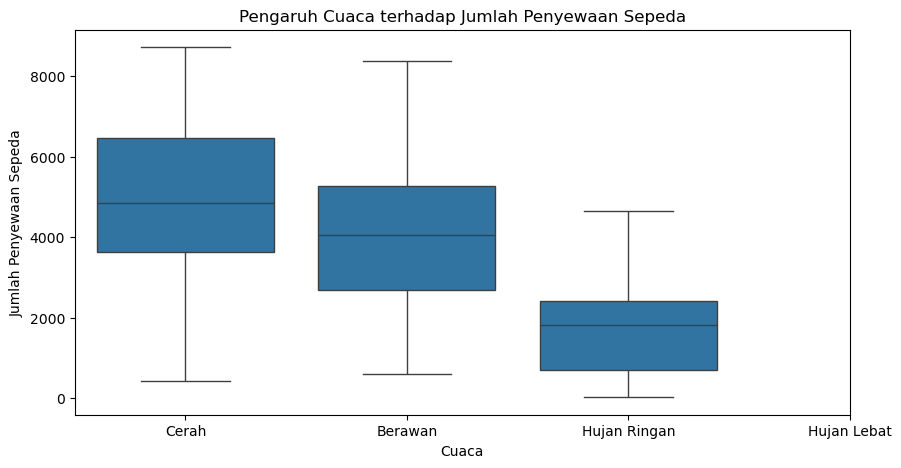

In [31]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Pertanyaan 1: Pengaruh Cuaca terhadap Penyewaan Sepeda ---")

# Visualisasi pengaruh cuaca terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', data=day_df)

# Menambahkan label dan judul
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda")


plt.xticks([0, 1, 2, 3], ['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Lebat'])

# Menampilkan grafik
plt.show()


**Insight:**
- Dari grafik boxplot, kita bisa melihat bahwa cuaca sangat memengaruhi jumlah penyewaan sepeda.
- Cuaca cerah (Cerah) memiliki jumlah penyewaan tertinggi, karena kondisi ini paling mendukung untuk bersepeda.
- Cuaca buruk (Hujan Lebat) menyebabkan penurunan drastis dalam penyewaan sepeda, karena hujan deras membuat orang enggan menggunakan sepeda.

### Pertanyaan 2: Kapan waktu dengan jumlah penyewaan sepeda terbanyak?


--- Pertanyaan 2: Waktu dengan Jumlah Penyewaan Sepeda Terbanyak ---


C:\Users\User\AppData\Local\Temp\ipykernel_19292\759862999.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None, marker="o", linestyle="-")


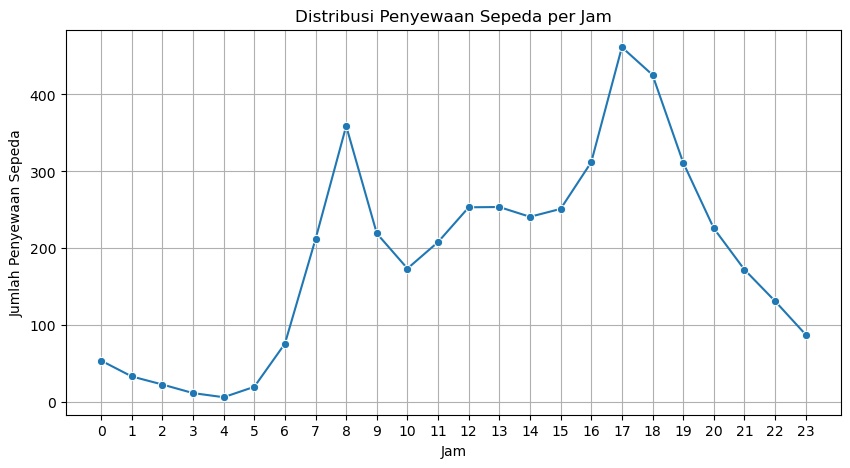

In [20]:
print("\n--- Pertanyaan 2: Waktu dengan Jumlah Penyewaan Sepeda Terbanyak ---")

# Pastikan kolom 'hr' ada di hour_df sebelum visualisasi
if 'hr' in hour_df.columns:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='hr', y='cnt', data=hour_df, ci=None, marker="o", linestyle="-")

    # Menambahkan label dan judul
    plt.xlabel("Jam")
    plt.ylabel("Jumlah Penyewaan Sepeda")
    plt.title("Distribusi Penyewaan Sepeda per Jam")

    # Menampilkan semua jam dari 0-23
    plt.xticks(range(0, 24))

    # Menambahkan grid untuk meningkatkan keterbacaan
    plt.grid(True)

    # Menampilkan grafik
    plt.show()
else:
    print("Kolom 'hr' tidak ditemukan di hour_df. Pastikan dataset sudah benar.")


**Insight:**
- Dari grafik jumlah penyewaan sepeda per jam, terlihat bahwa puncak penyewaan terjadi pada pagi hari (sekitar jam 7-9) dan sore hari (sekitar jam 17-19).
- Hal ini dapat dikaitkan dengan waktu orang-orang berangkat dan pulang kerja.
- Pada malam hari, jumlah penyewaan menurun karena penggunaan sepeda lebih rendah saat itu.

## Conclusion

📌 Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
-
📝 Kesimpulan:

- Cuaca yang lebih cerah memiliki jumlah penyewaan sepeda yang lebih tinggi dibandingkan dengan cuaca berawan atau hujan.
- Saat hujan ringan, jumlah penyewaan menurun cukup drastis.
- Ketika terjadi hujan lebat, jumlah penyewaan sepeda sangat rendah.
- Hal ini menunjukkan bahwa cuaca berpengaruh signifikan terhadap keputusan pengguna dalam menyewa sepeda.

📌 Pertanyaan 2: Kapan waktu dengan jumlah penyewaan sepeda terbanyak?
-
📝 Kesimpulan:

- Jumlah penyewaan sepeda paling tinggi terjadi pada jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
- Hal ini menunjukkan bahwa banyak pengguna yang menyewa sepeda sebagai alat transportasi untuk pergi dan pulang kerja/sekolah.
- Pada malam hari dan dini hari (00:00 - 05:00), jumlah penyewaan sangat rendah.
- Dari pola ini, operator penyewaan sepeda dapat menyesuaikan jumlah sepeda yang tersedia sesuai dengan jam sibuk.
